In [ ]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.io as sio
import anndata as ad
import matplotlib.pyplot as plt

os.chdir("/data/wuqinhua/scPhase/CRC")

/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: 

# 1. Cell-level

In [ ]:
adata = sc.read_h5ad("./ensemble_adata_with_attention.h5ad")
adata

AnnData object with n_obs × n_vars = 370115 × 5000
    obs: 'SPECIMEN_TYPE', 'SOURCE_HOSPITAL', 'TISSUE_PROCESSING_TEAM', 'PROCESSING_TYPE', 'SINGLECELL_TYPE', 'sample_id', 'HistologicTypeSimple', 'MMR_IHC', 'phenotype', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize', 'SizeQuantile', 'PID', 'Sex', 'Age', 'Ethnicity', 'Race', 'batchID', 'clTopLevel', 'celltype', 'cl295v11SubShort', 'cl295v11SubFull', 'attention_weight_mean', 'attention_weight_std'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'phenotype_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
metadata = adata.obs
metadata.to_csv("./CRC_metadata.csv")

In [ ]:
idList = adata.obs['sample_id'].unique()
for id in idList:
    attnTmp = adata.obs[adata.obs['sample_id'] == id]
    avgScore = 1 / len(attnTmp)
    log_attn = np.log2(attnTmp['attention_weight_mean'] / avgScore)
    attn_scaled = (log_attn - np.mean(log_attn)) / np.std(log_attn)
    attn_scaled_clipped = np.clip(attn_scaled, -1, 1)
    adata.obs.loc[adata.obs['sample_id'] == id, 'attn_scaled'] = attn_scaled_clipped

In [ ]:
adata1 = adata[adata.obs['phenotype'] == "normal"]
adata2 = adata[adata.obs['phenotype'] == "MMRd"]
adata3 = adata[adata.obs['phenotype'] == "MMRp"]

In [ ]:
sc.settings.verbosity = 1
sc.settings.figdir = './Analysis/Figure/Attn_plot'
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=400,
    facecolor = 'white', figsize=(6,6), format='png')
def one_col_lgd(umap,ncol):
    legend = umap.legend(bbox_to_anchor=[1.00, 0.5],
    loc='center left', ncol=ncol, prop={'size': 6})
    legend.get_frame().set_linewidth(0.0)
    return legend

/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


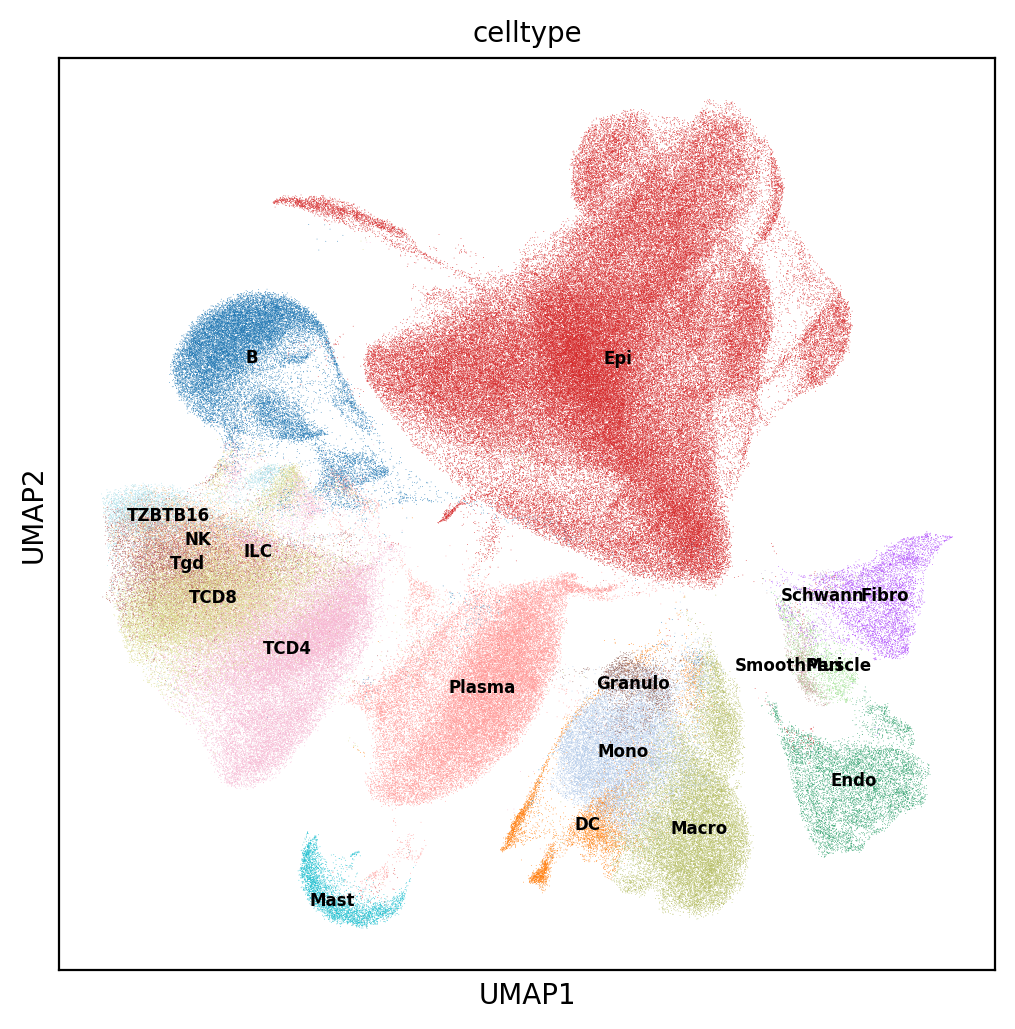

In [ ]:
leiden_umap = sc.pl.umap(adata, color='celltype', show=False, legend_fontsize=6, legend_loc='on data')

/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


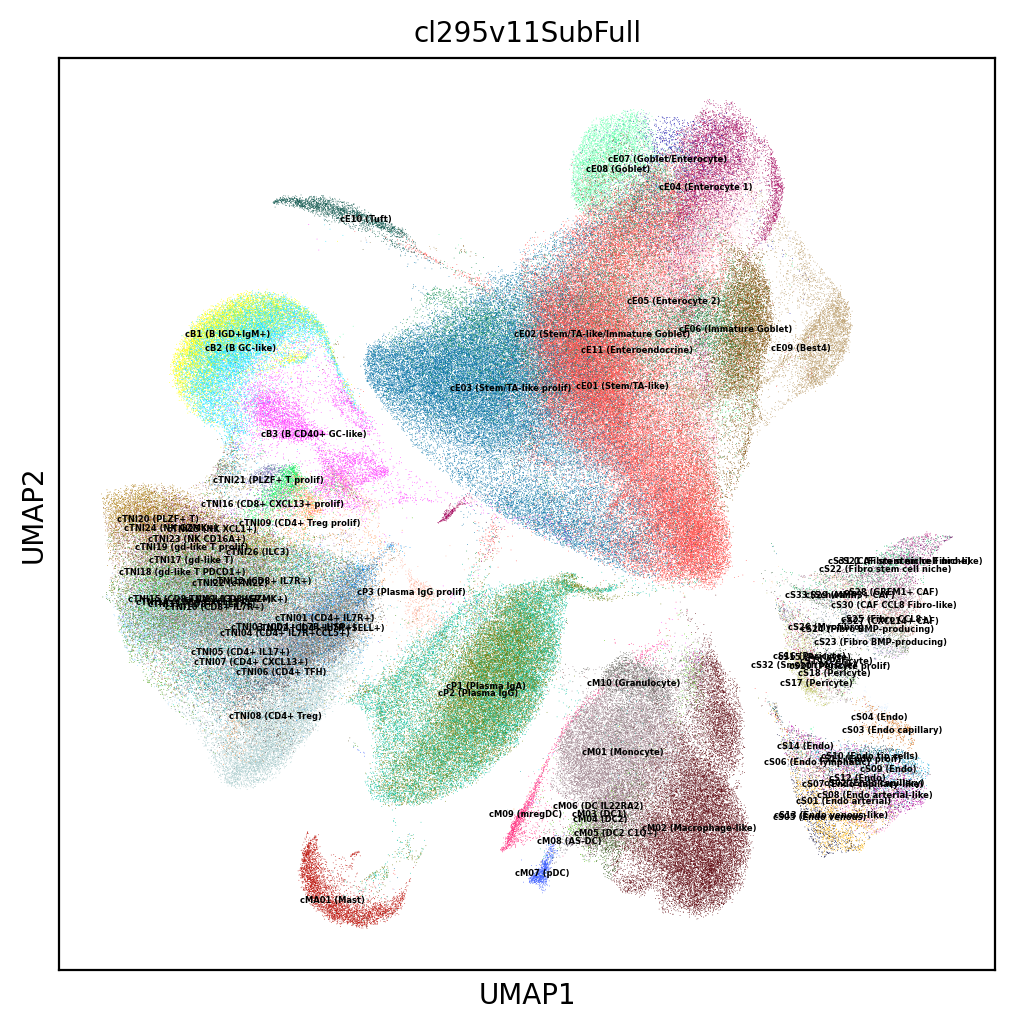

In [ ]:
leiden_umap = sc.pl.umap(adata, color='cl295v11SubFull', show=False, legend_fontsize=3, legend_loc='on data')

/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


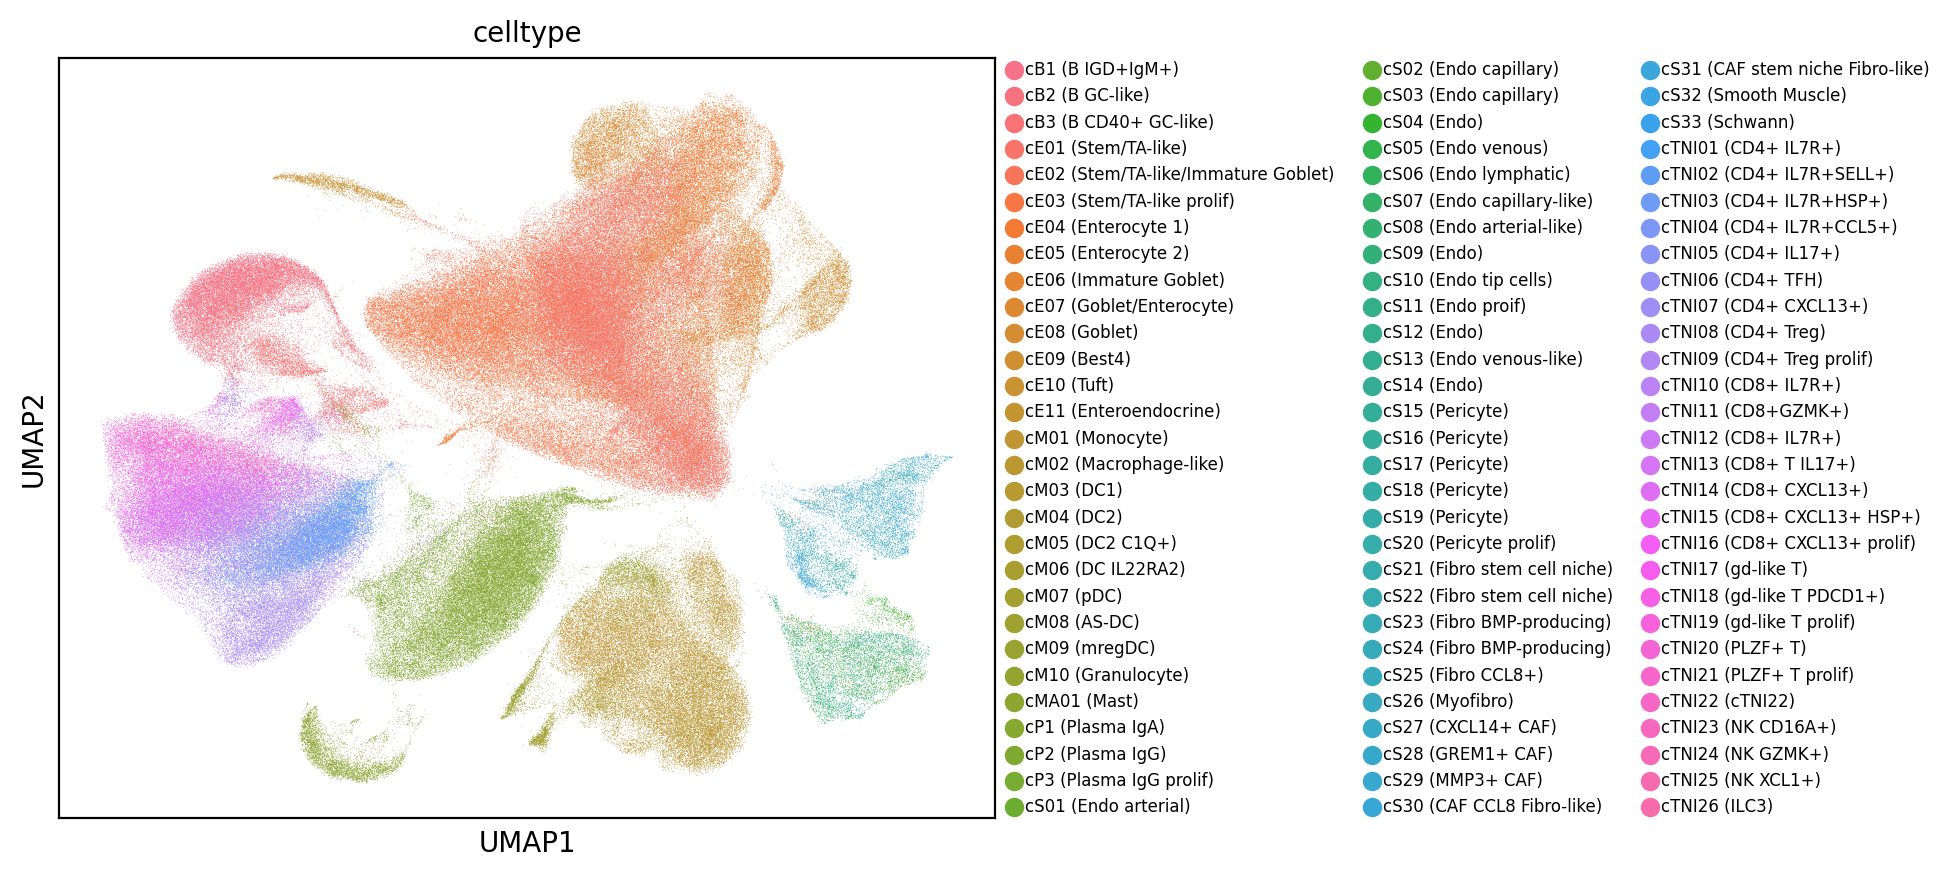

In [ ]:
leiden_umap = sc.pl.umap(adata, color=['cl295v11SubFull'],
    show=False, palette=sns.color_palette("husl", 90),
legend_fontsize=6, frameon=True, title='celltype')
lgd = one_col_lgd(leiden_umap,3)
fig = leiden_umap.get_figure()
fig.set_size_inches(6, 5)
fig.savefig(str(sc.settings.figdir) + '/umap_celltype.pdf', 
            format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
leiden_umap = sc.pl.umap(adata1, color='attn_scaled', show=False, legend_fontsize=6, color_map ='viridis',
                           frameon= True, title='Attention Score of normal',save="_attn_normal.pdf")

In [ ]:
leiden_umap = sc.pl.umap(adata2, color='attn_scaled', show=False, legend_fontsize=6, color_map ='viridis',
                           frameon= True, title='Attention Score of MMRd',save="_attn_MMRd.pdf")

In [ ]:
leiden_umap = sc.pl.umap(adata3, color='attn_scaled', show=False, legend_fontsize=6, color_map ='viridis',
                           frameon= True, title='Attention Score of MMRp',save="_attn_MMRp.pdf")

# 2. Celltype-level

In [1]:
setwd('/data/wuqinhua/scPhase/CRC')
# rm(list = ls())
# gc()

library(tidyr)
library(ggplot2)
library(forestploter)
library(gridExtra)
library(tidyverse)
library(dplyr)
library(broom)
library(ggpubr)
library(randomForest)
library(mice)
library(reshape2)
library(Metrics)
library(ComplexHeatmap)
library(RColorBrewer)
library(fastcluster)
library(ggbeeswarm)
library(circlize)
library(ggrepel)
library(ggpubr)
library(scales) 
library(ggtext) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:bas

### 2.1 Scatter trend plot

In [2]:
attnData = read.csv('./CRC_metadata.csv')
head(attnData)
colnames(attnData)

nameAll = unique(attnData$celltype)
nameAll = sort(nameAll)
nameAll

nameList = nameAll

sampleFold = data.frame(id = character(), celltype = character(), fold = numeric())
idList = unique(attnData$sample_id)
for (id in idList) {
  attnTmp = attnData %>% filter(sample_id == id)
  avgScore = 1 / dim(attnTmp)[1]
  foldRes = attnTmp %>% group_by(celltype) %>% summarise(res = median(log2(attention_weight_mean/avgScore)))
  dataTmp = data.frame(id = rep(id,dim(foldRes)[1]),
                       celltype = foldRes$celltype,
                       fold = foldRes$res)
  dataTmp_s = dataTmp %>% filter(celltype %in% nameList)
  
  dataTmp_s$fold = scale(dataTmp_s$fold)
  sampleFold = rbind(sampleFold,dataTmp_s)
}

sampleFold.Table = dcast(sampleFold,id ~ celltype)
rownames(sampleFold.Table) = sampleFold.Table$id
sampleFold.Table$id = NULL

sampleInfo = read.csv('./sample_info.csv')
rownames(sampleInfo) = sampleInfo$sample
sampleInfo = sampleInfo[rownames(sampleFold.Table),]
head(sampleFold.Table)

X                                      SPECIMEN_TYPE SOURCE_HOSPITAL
1 C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT T             MGH            
2 C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT T             MGH            
3 C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG T             MGH            
4 C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT T             MGH            
5 C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC T             MGH            
6 C103_T_1_1_0_c1_v2_id-AAACCTGTCGGATGTT T             MGH            
  TISSUE_PROCESSING_TEAM PROCESSING_TYPE SINGLECELL_TYPE sample_id
1 Hacohen                unsorted        SC3Pv2          C103_T   
2 Hacohen                unsorted        SC3Pv2          C103_T   
3 Hacohen                unsorted        SC3Pv2          C103_T   
4 Hacohen                unsorted        SC3Pv2          C103_T   
5 Hacohen                unsorted        SC3Pv2          C103_T   
6 Hacohen                unsorted        SC3Pv2          C103_T   
  HistologicTypeSimple MMR_IHC   phenotype ⋯ Age Ethnicity Race 
1 Adenocarcinoma       preserved MMRp      ⋯ 45  No        Asian
2 Adenocarcinoma       preserved MMRp      ⋯ 45  No        Asian
3 Adenocarcinoma       preserved MMRp      ⋯ 45  No        Asian
4 Adenocarcinoma       preserved MMRp      ⋯ 45  No        Asian
5 Adenocarcinoma       preserved MMRp      ⋯ 45  No        Asian
6 Adenocarcinoma       preserved MMRp      ⋯ 45  No        Asian
  batchID            clTopLevel celltype cl295v11SubShort
1 C103_T_1_1_0_c1_v2 Epi        Epi      cE01            
2 C103_T_1_1_0_c1_v2 Epi        Epi      cE01            
3 C103_T_1_1_0_c1_v2 Epi        Epi      cE03            
4 C103_T_1_1_0_c1_v2 Epi        Epi      cE01            
5 C103_T_1_1_0_c1_v2 Epi        Epi      cE01            
6 C103_T_1_1_0_c1_v2 TNKILC     TCD4     cTNI05          
  cl295v11SubFull            attention_weight_mean attention_weight_std
1 cE01 (Stem/TA-like)        7.250011e-06          5.917337e-06        
2 cE01 (Stem/TA-like)        1.531737e-06          1.617857e-06        
3 cE03 (Stem/TA-like prolif) 3.145341e-03          2.009793e-03        
4 cE01 (Stem/TA-like)        9.179328e-05          3.403796e-05        
5 cE01 (Stem/TA-like)        5.074458e-04          2.113296e-04        
6 cTNI05 (CD4+ IL17+)        1.708750e-06          2.187226e-06

[1] "X"                        "SPECIMEN_TYPE"           
 [3] "SOURCE_HOSPITAL"          "TISSUE_PROCESSING_TEAM"  
 [5] "PROCESSING_TYPE"          "SINGLECELL_TYPE"         
 [7] "sample_id"                "HistologicTypeSimple"    
 [9] "MMR_IHC"                  "phenotype"               
[11] "MLH1Status"               "MMRMLH1Tumor"            
[13] "TissueSite_detailed"      "TissueSiteSimple"        
[15] "HistologicGrade_detailed" "HistologicGradeSimple"   
[17] "TumorStage"               "NodeStatus_detailed"     
[19] "NodeStatusSimple"         "MetastasisStatus"        
[21] "TumorSize"                "SizeQuantile"            
[23] "PID"                      "Sex"                     
[25] "Age"                      "Ethnicity"               
[27] "Race"                     "batchID"                 
[29] "clTopLevel"               "celltype"                
[31] "cl295v11SubShort"         "cl295v11SubFull"         
[33] "attention_weight_mean"    "attention_weight_std"

[1] "B"            "DC"           "Endo"         "Epi"          "Fibro"       
 [6] "Granulo"      "ILC"          "Macro"        "Mast"         "Mono"        
[11] "NK"           "Peri"         "Plasma"       "Schwann"      "SmoothMuscle"
[16] "TCD4"         "TCD8"         "Tgd"          "TZBTB16"

Using fold as value column: use value.var to override.



B          DC          Endo        Epi       Fibro       Granulo   
C103_T -1.0557914  0.24194608  0.10707482 2.9028076  0.05706085 -0.5980912
C104_T -1.4131292  0.60707842 -0.26820573 0.6955961  1.05177943  0.1652460
C105_T -1.3826808 -0.15923346  0.55260618 1.5704118  0.76258447 -0.3863844
C106_N -0.7713886  0.15462970  0.03373944 2.3207190 -0.65417666         NA
C106_T -1.2644004 -0.00473496 -1.11860790 0.3295894  0.03118779 -0.8341116
C107_N -1.3627151  0.41623223  0.09024606 1.2426859 -0.46702916         NA
       ILC        Macro     Mast        Mono      NK          Peri       
C103_T -0.7140597 1.6634709 -0.30957974 0.7835964 -0.53062263 -0.15645958
C104_T -1.2723632 0.3007350 -0.02738155 2.1513439 -0.33879595  0.01669433
C105_T  0.4046054 1.3589184 -0.32067364 1.8554968 -0.55076049  0.09191086
C106_N         NA 0.1330955 -0.77612726 1.9994902 -0.02382485  0.48907911
C106_T  0.5908785 1.9549360 -0.38148524 2.0491452 -0.62809137          NA
C107_N -0.1826194 1.3770653 -0.01968206 2.4247194  0.25406174          NA
       Plasma     Schwann    SmoothMuscle TCD4       TCD8       Tgd       
C103_T -1.1426964         NA 0.5398792    -0.4911514 -0.6984847 -0.6381574
C104_T -1.6829990         NA        NA    -0.5130893 -0.8256962  0.0446649
C105_T -1.5387604         NA        NA    -0.7625441 -0.4017975  0.1545090
C106_N -0.7385345 -0.3653624 0.8472089    -0.6949292 -0.2370962 -1.6642888
C106_T -1.3023002         NA        NA    -0.3518601 -0.1330338  0.6586221
C107_N -1.1474363 -0.4883825 0.7266003    -1.0264842 -0.7634889 -0.4160225
       TZBTB16    
C103_T  0.03925825
C104_T  1.30852222
C105_T -1.24820809
C106_N -0.05223332
C106_T  0.40426654
C107_N -0.65775077

cell_type kruskal_wallis_p_value neg_log10_pval
1 B         3.722184e-04           3.4292022     
2 DC        5.257638e-01           0.2792093     
3 Endo      8.714815e-06           5.0597418     
4 Epi       3.873024e-08           7.4119498     
5 Fibro     1.314810e-01           0.8811369     
6 Granulo   7.465155e-02           1.1269612

cell_type overall_sd
1 B         0.2497720 
2 DC        0.4136040 
3 Endo      0.3532740 
4 Epi       0.7191420 
5 Fibro     0.3671103 
6 Granulo   0.3848567

cell_type kruskal_wallis_p_value neg_log10_pval overall_sd scaled_pval
1 B         3.722184e-04           3.4292022      0.2497720  0.31002294 
2 DC        5.257638e-01           0.2792093      0.4136040  0.00000000 
3 Endo      8.714815e-06           5.0597418      0.3532740  0.47050099 
4 Epi       3.873024e-08           7.4119498      0.7191420  0.70200578 
5 Fibro     1.314810e-01           0.8811369      0.3671103  0.05924184 
6 Granulo   7.465155e-02           1.1269612      0.3848567  0.08343591 
  scaled_sd  keyness_score label_text
1 0.05440279 0.01686611    B         
2 0.25525516 0.00000000              
3 0.18129263 0.08529836    Endo      
4 0.62983409 0.44214717    Epi       
5 0.19825551 0.01174502              
6 0.22001192 0.01835689    Granulo

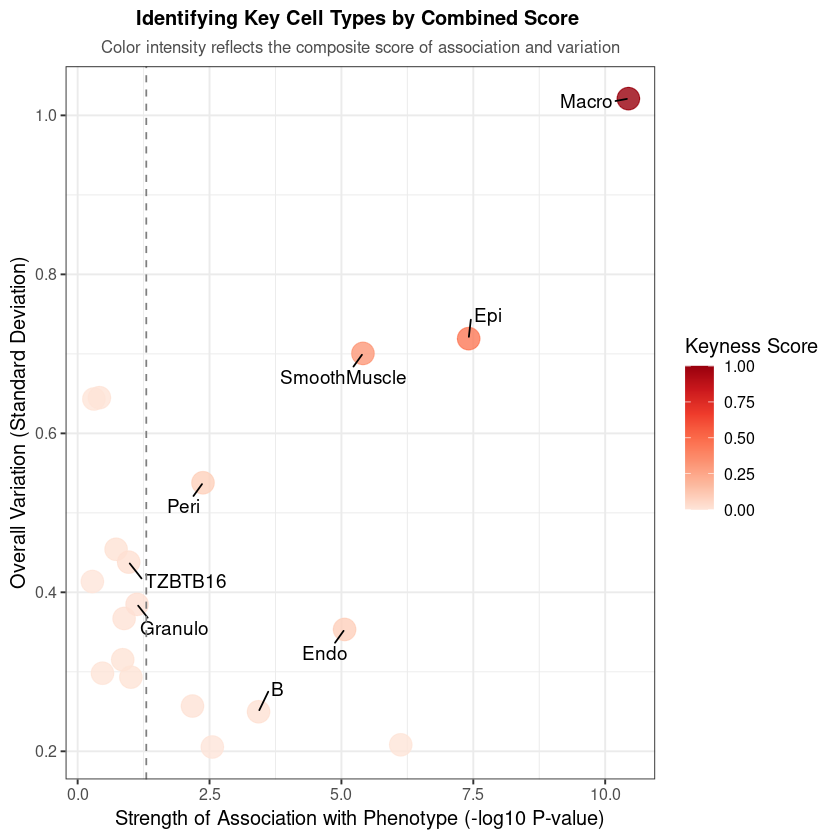

In [3]:
# ===================================================================
# 1. Calculation Score One: Association with Categorical Phenotypes (Kruskal-Wallis Test)
# ===================================================================
sampleInfo$phenotype <- as.factor(sampleInfo$phenotype)
sampleInfo <- sampleInfo[rownames(sampleFold.Table), ]
phenotype_association_scores_class <- data.frame(
  cell_type = character(),
  kruskal_wallis_p_value = numeric()
)

for (cell in colnames(sampleFold.Table)) {
  test_data <- data.frame(
    score = sampleFold.Table[[cell]],
    group = sampleInfo$phenotype
  )

  test_result <- kruskal.test(score ~ group, data = test_data)
  

  phenotype_association_scores_class <- rbind(
    phenotype_association_scores_class,
    data.frame(
      cell_type = cell,
      kruskal_wallis_p_value = test_result$p.value
    )
  )
}

phenotype_association_scores_class <- phenotype_association_scores_class %>%
  mutate(neg_log10_pval = -log10(kruskal_wallis_p_value))

head(phenotype_association_scores_class)


# ===================================================================
# 2. Calculation Score Two: Group Volatility (Standard deviation)
# ===================================================================

overall_variation_scores <- data.frame(
  cell_type = character(),
  overall_sd = numeric()
)

for (cell in colnames(sampleFold.Table)) {
  sd_val <- sd(sampleFold.Table[[cell]], na.rm = TRUE)
  overall_variation_scores <- rbind(
    overall_variation_scores,
    data.frame(
      cell_type = cell,
      overall_sd = sd_val
    )
  )
}
head(overall_variation_scores)


# ===================================================================
# 3. Integrate the scores and create "key scores" for coloring
# ===================================================================

plot_data_combined_score <- merge(
  phenotype_association_scores_class, 
  overall_variation_scores, 
  by = "cell_type"
) %>%
  mutate(
    scaled_pval = rescale(neg_log10_pval, to = c(0, 1)),
    scaled_sd = rescale(overall_sd, to = c(0, 1)),
    keyness_score = scaled_pval * scaled_sd,
    label_text = ifelse(keyness_score > quantile(keyness_score, 0.6, na.rm = TRUE), cell_type, "")
  )

head(plot_data_combined_score)


# ===================================================================
# 4. Plot
# ===================================================================

combined_score_plot <- ggplot(plot_data_combined_score, 
                              aes(x = neg_log10_pval, 
                                  y = overall_sd, 
                                  color = keyness_score, 
                                  label = label_text)) +
  
  geom_point(size = 6, alpha = 0.8) +
  scale_color_distiller(palette = "Reds", direction = 1, name = "Keyness Score") +
  geom_text_repel(color = "black", size = 4, max.overlaps = Inf,
                  box.padding = 0.6, min.segment.length = 0) +
  geom_vline(xintercept = -log10(0.05), linetype = "dashed", color = "gray50") +
  theme_bw(base_size = 12) +

  labs(
    title = "Identifying Key Cell Types by Combined Score ",
    subtitle = "Color intensity reflects the composite score of association and variation",
    x = "Strength of Association with Phenotype (-log10 P-value)",
    y = "Overall Variation (Standard Deviation)"
  ) +
  
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
    plot.subtitle = element_text(hjust = 0.5, size = 10, color = "gray30"),
    legend.position = "right"
  )

ggsave("./Analysis/Figure/Attn_plot/classification_combined_score_plot.pdf", 
       combined_score_plot, 
       width = 6, height = 5, dpi = 300)

print(combined_score_plot)

### 2.2 Violin Plot

[1] "cB1 (B IGD+IgM+)"                    "cB2 (B GC-like)"                    
 [3] "cB3 (B CD40+ GC-like)"               "cE01 (Stem/TA-like)"                
 [5] "cE02 (Stem/TA-like/Immature Goblet)" "cE03 (Stem/TA-like prolif)"         
 [7] "cE04 (Enterocyte 1)"                 "cE05 (Enterocyte 2)"                
 [9] "cE06 (Immature Goblet)"              "cE07 (Goblet/Enterocyte)"           
[11] "cE08 (Goblet)"                       "cE09 (Best4)"                       
[13] "cE10 (Tuft)"                         "cE11 (Enteroendocrine)"             
[15] "cM01 (Monocyte)"                     "cM02 (Macrophage-like)"             
[17] "cM03 (DC1)"                          "cM04 (DC2)"                         
[19] "cM05 (DC2 C1Q+)"                     "cM06 (DC IL22RA2)"                  
[21] "cM07 (pDC)"                          "cM08 (AS-DC)"                       
[23] "cM09 (mregDC)"                       "cM10 (Granulocyte)"                 
[25] "cMA01 (Mast)"                        "cP1 (Plasma IgA)"                   
[27] "cP2 (Plasma IgG)"                    "cP3 (Plasma IgG prolif)"            
[29] "cS01 (Endo arterial)"                "cS02 (Endo capillary)"              
[31] "cS03 (Endo capillary)"               "cS04 (Endo)"                        
[33] "cS05 (Endo venous)"                  "cS06 (Endo lymphatic)"              
[35] "cS07 (Endo capillary-like)"          "cS08 (Endo arterial-like)"          
[37] "cS09 (Endo)"                         "cS10 (Endo tip cells)"              
[39] "cS11 (Endo proif)"                   "cS12 (Endo)"                        
[41] "cS13 (Endo venous-like)"             "cS14 (Endo)"                        
[43] "cS15 (Pericyte)"                     "cS16 (Pericyte)"                    
[45] "cS17 (Pericyte)"                     "cS18 (Pericyte)"                    
[47] "cS19 (Pericyte)"                     "cS20 (Pericyte prolif)"             
[49] "cS21 (Fibro stem cell niche)"        "cS22 (Fibro stem cell niche)"       
[51] "cS23 (Fibro BMP-producing)"          "cS24 (Fibro BMP-producing)"         
[53] "cS25 (Fibro CCL8+)"                  "cS26 (Myofibro)"                    
[55] "cS27 (CXCL14+ CAF)"                  "cS28 (GREM1+ CAF)"                  
[57] "cS29 (MMP3+ CAF)"                    "cS30 (CAF CCL8 Fibro-like)"         
[59] "cS31 (CAF stem niche Fibro-like)"    "cS32 (Smooth Muscle)"               
[61] "cS33 (Schwann)"                      "cTNI01 (CD4+ IL7R+)"                
[63] "cTNI02 (CD4+ IL7R+SELL+)"            "cTNI03 (CD4+ IL7R+HSP+)"            
[65] "cTNI04 (CD4+ IL7R+CCL5+)"            "cTNI05 (CD4+ IL17+)"                
[67] "cTNI06 (CD4+ TFH)"                   "cTNI07 (CD4+ CXCL13+)"              
[69] "cTNI08 (CD4+ Treg)"                  "cTNI09 (CD4+ Treg prolif)"          
[71] "cTNI10 (CD8+ IL7R+)"                 "cTNI11 (CD8+GZMK+)"                 
[73] "cTNI12 (CD8+ IL7R+)"                 "cTNI13 (CD8+ T IL17+)"              
[75] "cTNI14 (CD8+ CXCL13+)"               "cTNI15 (CD8+ CXCL13+ HSP+)"         
[77] "cTNI16 (CD8+ CXCL13+ prolif)"        "cTNI17 (gd-like T)"                 
[79] "cTNI18 (gd-like T PDCD1+)"           "cTNI19 (gd-like T prolif)"          
[81] "cTNI20 (PLZF+ T)"                    "cTNI21 (PLZF+ T prolif)"            
[83] "cTNI22 (cTNI22)"                     "cTNI23 (NK CD16A+)"                 
[85] "cTNI24 (NK GZMK+)"                   "cTNI25 (NK XCL1+)"                  
[87] "cTNI26 (ILC3)"

Using fold as value column: use value.var to override.



cB1 (B IGD+IgM+) cB2 (B GC-like) cB3 (B CD40+ GC-like)
C103_T -1.6246080       -1.1125152      -0.7777493           
C104_T -1.1214465       -0.9820323      -1.1778723           
C105_T -1.2354582       -1.0782602      -1.0063481           
C106_N -0.7728139       -0.6203444      -0.7157140           
C106_T -1.0729401       -0.8879602      -1.0905274           
C107_N -0.9471808       -0.7576699      -0.7662300           
       cE01 (Stem/TA-like) cE02 (Stem/TA-like/Immature Goblet)
C103_T  1.73916463         1.6583289                          
C104_T -0.26375551         0.7824352                          
C105_T  0.30097181         1.5692177                          
C106_N  0.21421181         0.9621703                          
C106_T -0.09877920         0.8577333                          
C107_N  0.07840035         0.2957072                          
       cE03 (Stem/TA-like prolif) cE04 (Enterocyte 1) cE05 (Enterocyte 2)
C103_T 4.9922257                  0.5053728            1.2430052         
C104_T 1.1013746                  2.1505709            0.2752698         
C105_T 1.4530801                  1.3906364            0.3017401         
C106_N 0.6366068                  3.1033034            2.3702590         
C106_T 0.9687415                  0.8422517           -0.3726766         
C107_N 0.3028277                  3.3391037            2.5367232         
       cE06 (Immature Goblet) cE07 (Goblet/Enterocyte) ⋯ cTNI17 (gd-like T)
C103_T -0.09476358            -0.7804385               ⋯ -0.7191549        
C104_T -0.23685386             3.0711757               ⋯ -0.8084781        
C105_T  0.19271786             4.0593807               ⋯ -0.1920187        
C106_N -0.07893345             3.4185666               ⋯ -1.2245031        
C106_T -0.12888391                    NA               ⋯  0.7834270        
C107_N -0.02006920             4.0714341               ⋯ -0.4378420        
       cTNI18 (gd-like T PDCD1+) cTNI19 (gd-like T prolif) cTNI20 (PLZF+ T)
C103_T -0.41589938                     NA                  -0.13718307     
C104_T -0.02452201                     NA                   0.31369555     
C105_T -0.18253468                     NA                  -0.96680896     
C106_N          NA                     NA                  -0.30592754     
C106_T -0.45096633               1.302967                   0.06101126     
C107_N          NA                     NA                  -0.55964822     
       cTNI21 (PLZF+ T prolif) cTNI22 (cTNI22) cTNI23 (NK CD16A+)
C103_T 1.2561498               -0.3053860      -0.55075141       
C104_T 1.2912054               -1.0365673      -0.48940882       
C105_T        NA               -0.9686381      -0.57921626       
C106_N        NA                       NA      -0.56296801       
C106_T 1.8690597               -1.1165150      -0.66684802       
C107_N 0.0596247                0.1973684      -0.06626434       
       cTNI24 (NK GZMK+) cTNI25 (NK XCL1+) cTNI26 (ILC3)
C103_T -0.81484392       -0.5345947        -0.76694851  
C104_T -0.20750169       -1.1673476        -1.02907372  
C105_T -0.04886428       -0.3151883        -0.04829055  
C106_N -0.23810489               NA                 NA  
C106_T -0.64109278       -0.2774903         0.44138601  
C107_N -0.13204628       -1.2393126        -0.33132755

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

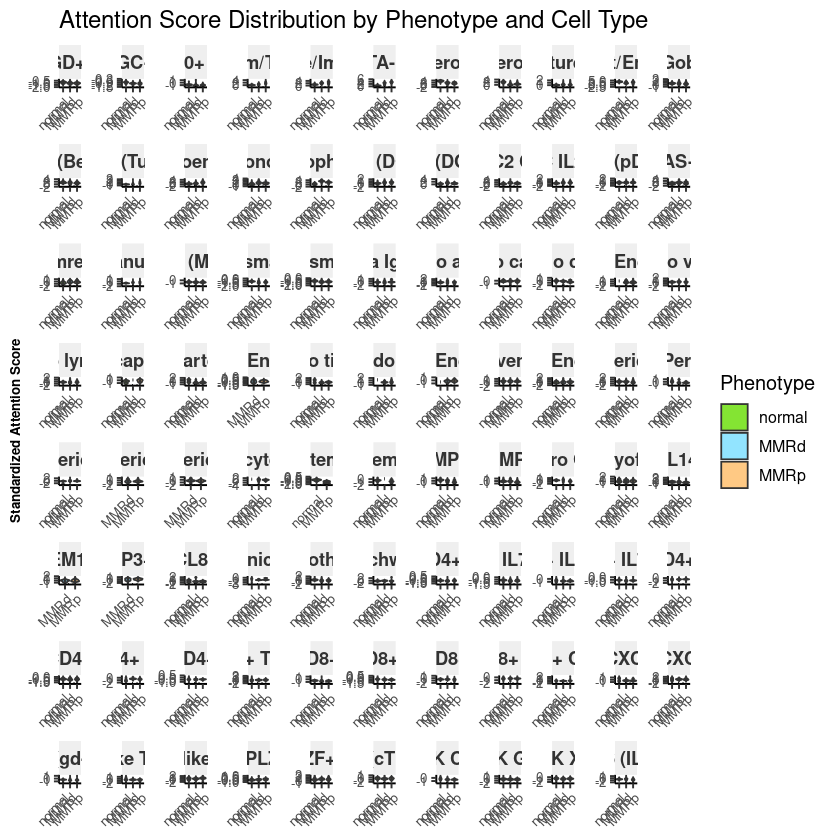

In [4]:
nameAll = unique(attnData$cl295v11SubFull)
nameAll = sort(nameAll)
nameAll

nameList = nameAll

sampleFold = data.frame(id = character(), celltype = character(), fold = numeric())
idList = unique(attnData$sample_id)
for (id in idList) {
  attnTmp = attnData %>% filter(sample_id == id)
  avgScore = 1 / dim(attnTmp)[1]
  foldRes = attnTmp %>% group_by(cl295v11SubFull) %>% summarise(res = median(log2(attention_weight_mean/avgScore)))
  dataTmp = data.frame(id = rep(id,dim(foldRes)[1]),
                       celltype = foldRes$cl295v11SubFull,
                       fold = foldRes$res)
  dataTmp_s = dataTmp %>% filter(celltype %in% nameList)
  dataTmp_s$fold = scale(dataTmp_s$fold)
  sampleFold = rbind(sampleFold,dataTmp_s)
}

sampleFold.Table = dcast(sampleFold,id ~ celltype)
rownames(sampleFold.Table) = sampleFold.Table$id
sampleFold.Table$id = NULL

sampleInfo = read.csv('./sample_info.csv')
rownames(sampleInfo) = sampleInfo$sample
sampleInfo = sampleInfo[rownames(sampleFold.Table),]
head(sampleFold.Table)


cell_types_attn <- colnames(sampleFold.Table)
combined_data_atten <- data.frame()
for (cell in cell_types_attn) {
  dataTmp <- data.frame(
    atten = sampleFold.Table[[cell]],
    group = sampleInfo$phenotype,
    cell_type = cell
  )
  dataTmp_s <- na.omit(dataTmp)
  combined_data_atten <- rbind(combined_data_atten, dataTmp_s)
}

custom_colors <- c("normal" = '#66DD00',"MMRd"="#77DDFF","MMRp"="#FFBB66")

plot_df_attn <- combined_data_atten %>%
  dplyr::rename(Attn = atten) %>%
  dplyr::mutate(group = factor(group, levels = names(custom_colors))) %>%
  na.omit()



annotation_data <- plot_df_attn %>%
  group_by(cell_type) %>%
  summarise(
    kruskal_test_res = list(kruskal.test(Attn ~ group)),
    p_value = kruskal_test_res[[1]]$p.value,
    h_statistic = kruskal_test_res[[1]]$statistic,
    .groups = 'drop'
  ) %>%
  mutate(
    significance = case_when(
      p_value < 0.001 ~ "***",
      p_value < 0.01  ~ "**",
      p_value < 0.05  ~ "*",
      TRUE ~ "ns"
    ),
    title_with_sig = paste0(cell_type, " ", significance),

    stat_label = paste0(
        "H = ", round(h_statistic, 2),     
        ", ",                               
        scales::pvalue(p_value,             
                       accuracy = 0.001, 
                       add_p = TRUE)
    )
  )
plot_df_attn_final <- plot_df_attn %>%
  left_join(annotation_data %>% select(cell_type, title_with_sig), by = "cell_type") %>%
  filter(!is.na(title_with_sig))

p_facet_classification_updated <- ggplot(plot_df_attn_final, 
                                         aes(x = group, y = Attn, fill = group)) +
  
  geom_violin(trim = FALSE, alpha = 0.8) +
  geom_boxplot(width = 0.1, fill = "white", alpha = 0.7, outlier.shape = NA) +
  
  geom_text(
    data = annotation_data, 
    aes(label = stat_label), 
    x = -Inf, y = Inf,
    hjust = -0.1, vjust = 2,
    size = 2,
    fontface = "italic",
    inherit.aes = FALSE
  ) + 
  
  scale_fill_manual(values = custom_colors, name = "Phenotype") +
  facet_wrap(~title_with_sig, scales = "free",ncol = 11,nrow = 8) +
  
  labs(
    title = "Attention Score Distribution by Phenotype and Cell Type",
    y = "Standardized Attention Score"
  ) +
  
  theme_classic(base_size = 12) +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    strip.background = element_rect(fill = "#EFEFEF", color = NA),
    strip.text = element_text(size = 11, face = "bold", color = "#333333"),
    axis.text.x = element_text(size = 8, angle = 45, hjust = 1), 
    axis.text.y = element_text(size = 8),
    axis.title = element_text(size = 8, face = "bold"),
    legend.position = "right",
    axis.title.x = element_blank()
  )

ggsave("./Analysis/Figure/Attn_plot/attn_classification_violin_plot.pdf",
       p_facet_classification_updated, width = 30, height =25, dpi = 300)

print(p_facet_classification_updated)